# Ads CTR Forecasting using Python

Ads CTR Analysis stands for Click-Through Rate Analysis for advertisements. Ads CTR Analysis is the process of examining the effectiveness of online advertisements by measuring the rate at which users click on an ad’s link to reach the advertiser’s website. 

Ads CTR Analysis and Forecasting are crucial for businesses to assess the return on investment (ROI) of their advertising efforts and make data-driven decisions to improve ad performance. Below are the steps we can follow for the task of Ads CTR Analysis and Forecasting:

1. Gather ad data, including the number of ad impressions (how often an ad was shown), the number of clicks, and any other relevant metrics.
2. Explore the data to understand its characteristics and distribution. Calculate basic statistics, such as the mean CTR (Click-Through Rate) and standard deviation.
3. Create visualizations, such as line charts or bar graphs, to represent CTR trends over time.
4. Conduct A/B tests if necessary to compare the performance of different ad variations.
5. Analyze the CTR data to identify factors that influence ad performance.
6. Build a forecasting model to predict future CTR values.

So, the process begins with collecting data. I found an ideal dataset for the task of Ads CTR Analysis and Forecasting. You can download the dataset from here (https://statso.io/ads-click-through-rate-case-study/)

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data = pd.read_csv('ctr.csv')
print(data.head())

         Date  Clicks  Impressions
0  2022-10-19    2851        58598
1  2022-10-20    2707        57628
2  2022-10-21    2246        50135
3  2022-10-22    1686        40608
4  2022-10-23    1808        41999


Let’s start by converting the Date column in the DataFrame from a string format to a datetime format and then setting it as the index of the DataFrame:

In [6]:
data['Date']=pd.to_datetime(data['Date'],format='%Y-%m-%d')

data.set_index('Date',inplace=True)


Now, let’s visualize the clicks and impressions over time:

In [8]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['Clicks'], mode='lines', name='CLicks'))
fig.add_trace(go.Scatter(x=data.index, y=data['Impressions'], mode='lines', name='Impressions'))
fig.update_layout(title='Clicks and Impressions Over Time')
fig.show()

Now, let’s have a look at the relationship between clicks and impressions:

In [9]:
fig_relation= px.scatter(data, x='Clicks', y='Impressions', title='Relation between clicks and impressions', labels={'Clicks':'Clicks','Impressions':'Impressions'})
fig_relation.update_layout(xaxis_title='Clicks', yaxis_title='Imressions')
fig_relation.show()

So, the relationship between clicks and impressions is linear. It means higher ad impressions result in higher ad clicks. Now, let’s calculate and visualize CTR over time:

In [10]:
data['CTR']=(data['Clicks']/data['Impressions'])*100

fig_ctr = px.line(data, x=data.index, y=data['CTR'], title = 'Click-Through Rate (CTR) Over Time')
fig_ctr.show()

Now, let’s have a look at the average CTR by day of the week:

In [14]:
data['DayOfWeek']=data.index.dayofweek
data['WeekOfMonth']=data.index.day // 7 + 1 

# EDA based on Day of Week
day_of_week_ctr = data.groupby('DayOfWeek')['CTR'].mean().reset_index()
day_of_week_ctr['DayOfWeek'] = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

fig_ctr_week = px.bar(day_of_week_ctr, x='DayOfWeek', y='CTR' , title='Average CTR by Day of the Week')
fig_ctr_week.show()

Now, let’s compare the CTR on weekdays and weekends:

In [17]:
# Create new colum to categorize the weekdays and weeekedns
data['DayCategory']= data['DayOfWeek'].apply(lambda x : 'Weekend' if x>=5 else 'Weekday')

# Find Average CTR by day category
ctr_by_day_category = data.groupby('DayCategory')['CTR'].mean().reset_index()

fig_ctr_by_day_category = px.bar(ctr_by_day_category, x='DayCategory', y='CTR', title='Comparison of CTR on Weekdays vs. Weekends', labels={'CTR':'Average CTR'})

fig_ctr_by_day_category.update_layout(yaxis_title='Average CTR')

fig_ctr_by_day_category.show()

Now, let’s compare the impressions and clicks on weekdays and weekends:

In [19]:
grouped_data = data.groupby('DayCategory')[['Clicks','Impressions']].sum().reset_index()

fig_click_impression_by_day_category = px.bar(grouped_data, x='DayCategory', y=['Clicks','Impressions'],
                                              title='Impressions and Clicks on Weekdays vs. Weekends',
                                              labels={'value':'Count', 'variable':'Matric'},
                                              color_discrete_sequence=['blue','green'])

fig_click_impression_by_day_category.update_layout(yaxis_title='Count')
fig_click_impression_by_day_category.update_xaxes(title_text='Day Category')

fig_click_impression_by_day_category.show()

# Ads CTR Forecasting
Now, let’s see how to forecast the Ads CTR. As CTR is dependent on impressions and impressions change over time, we can use Time Series forecasting techniques to forecast CTR. As CTR is seasonal, let’s calculate the p, d, and q values for the SARIMA model:

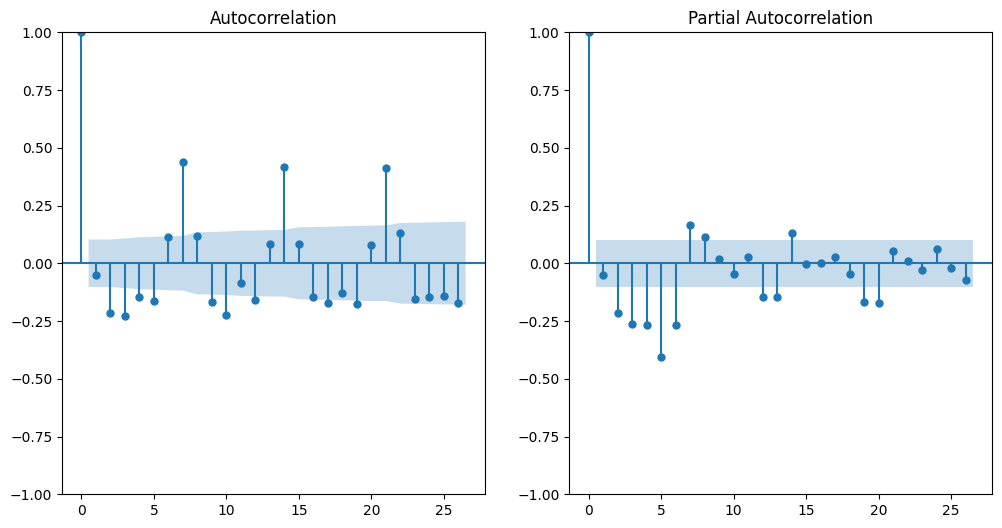

In [25]:
#data.reset_index(inplace=True)

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Resetting Index
time_series = data.set_index('Date')['CTR']

# Differencing
differenced_series = time_series.diff().dropna()

# Plot ACF and PACF of differenced time series
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_acf(differenced_series,ax= axes[0])
plot_pacf(differenced_series,ax= axes[1])

plt.show()

The value of p, d, and q will be one here. You can learn more about calculating p, d, and q values from here. And as we are using the SARIMA model here (https://thecleverprogrammer.com/2023/10/18/arima-and-sarima-for-time-series-forecasting/), the value of s will be 12.


Now, let’s train the forecasting model using SARIMA:

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p, d, q, s = 1, 1, 1, 12

model = SARIMAX(time_series, order=(p, d, q), seasonal_order=(p, d, q, s))
results = model.fit()
print(results.summary())

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.41935D-01    |proj g|=  7.75846D-01

At iterate    5    f=  2.17474D-01    |proj g|=  3.27836D-01

At iterate   10    f=  2.01124D-01    |proj g|=  1.03453D-01

At iterate   15    f=  1.96442D-01    |proj g|=  2.43175D-02

At iterate   20    f=  1.96376D-01    |proj g|=  1.32237D-02

At iterate   25    f=  1.95907D-01    |proj g|=  1.25147D-02

At iterate   30    f=  1.95561D-01    |proj g|=  9.02231D-04

At iterate   35    f=  1.95521D-01    |proj g|=  2.90605D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Now, here’s how to predict the future CTR values:

In [32]:
# Predict Future Value
future_step = 100

prediction = results.predict(len(time_series),len(time_series) + future_step-1)
print(prediction)

2023-10-19    3.852516
2023-10-20    3.889572
2023-10-21    3.820372
2023-10-22    3.727425
2023-10-23    3.710262
                ...   
2024-01-22    3.545706
2024-01-23    3.466784
2024-01-24    3.561326
2024-01-25    3.546834
2024-01-26    3.580249
Freq: D, Name: predicted_mean, Length: 100, dtype: float64


Now, let’s visualize the forecasted trend of CTR:

In [35]:
# Create a DataFrame with the original data and predictions

forecast = pd.DataFrame({'Original':time_series,'Prediction':prediction})

fig_forecast=go.Figure()

fig_forecast.add_trace(go.Scatter(x=forecast.index, y=forecast['Prediction'], mode='lines', name='Predictions'))
fig_forecast.add_trace(go.Scatter(x=forecast.index, y=forecast['Original'], mode='lines', name='Original Data'))

fig_forecast.update_layout()


# Summary
So, this is how we can analyze and forecast CTR using Python. Ads Click Through Rate Analysis and Forecasting are crucial for businesses to assess the return on investment (ROI) of their advertising efforts and make data-driven decisions to improve ad performance.